In [120]:
library(ISLR)
library(MASS)
# install.packages("MLmetrics")
library(MLmetrics)


Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall



In [5]:
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [6]:
lm.fit = lm(mpg~horsepower, data=Auto)

In [7]:
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


In [12]:
predict(lm.fit, data.frame(horsepower=c(98)), interval="confidence")

fit,lwr,upr
"24,46708","23,97308","24,96108"


In [13]:
predict(lm.fit, data.frame(horsepower=c(98)), interval="predict")

fit,lwr,upr
"24,46708","14,8094","34,12476"


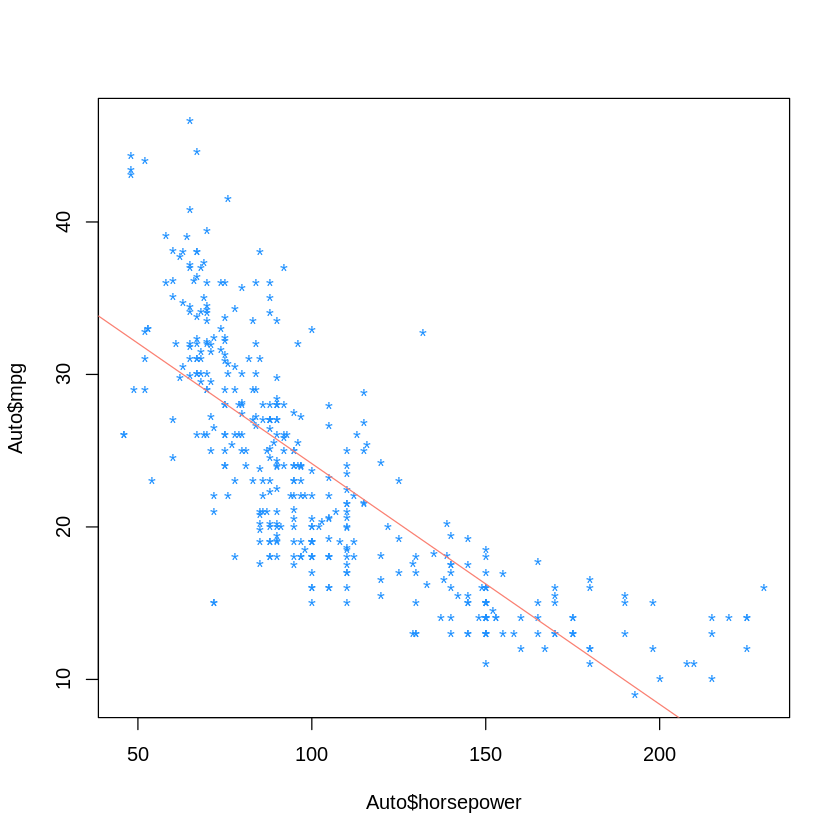

In [26]:
plot(Auto$horsepower, Auto$mpg, col="dodgerblue", pch="*")
abline(lm.fit, col="salmon")

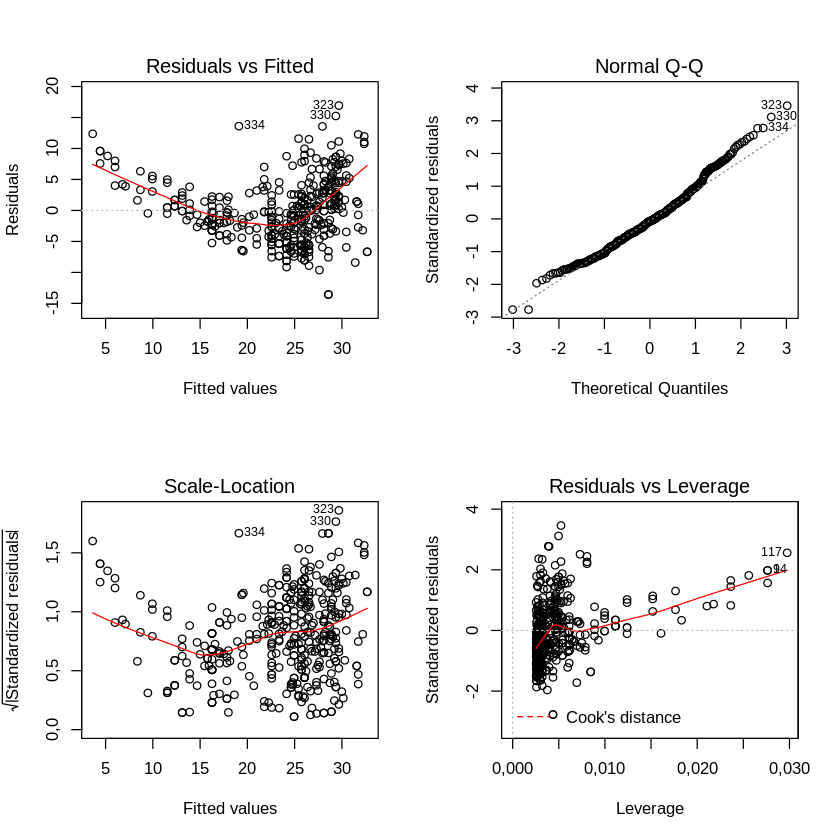

In [28]:
par(mfrow=c(2, 2))
plot(lm.fit)

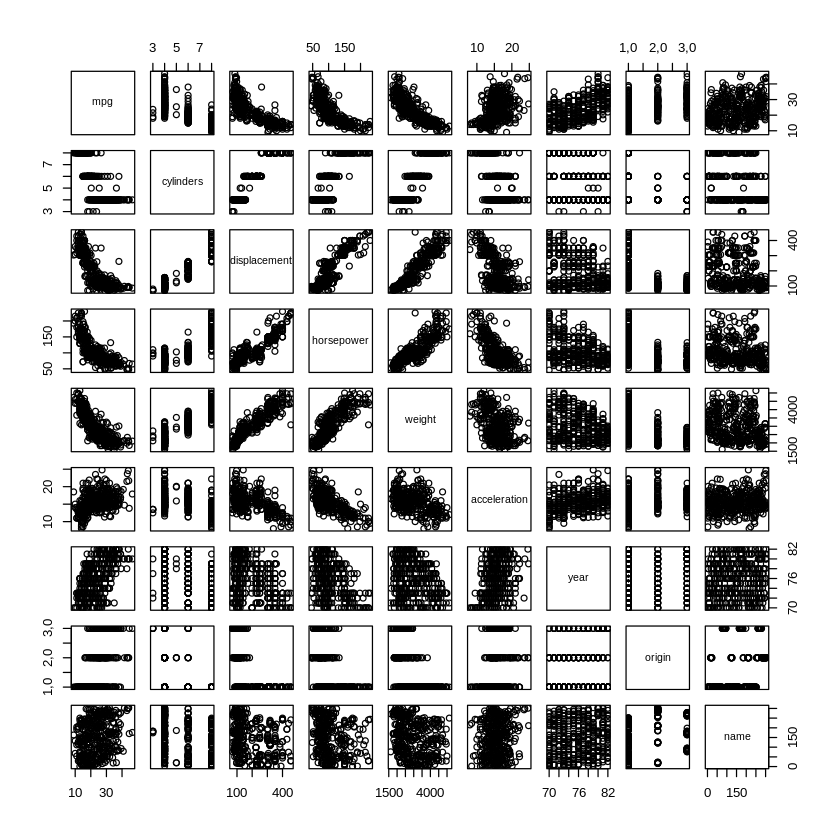

In [29]:
plot(Auto)

In [46]:
cor(Auto[names(Auto)[1:length(names(Auto))-1]])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,"1,0000000","-0,7776175","-0,8051269","-0,7784268","-0,8322442","0,4233285","0,5805410","0,5652088"
cylinders,"-0,7776175","1,0000000","0,9508233","0,8429834","0,8975273","-0,5046834","-0,3456474","-0,5689316"
displacement,"-0,8051269","0,9508233","1,0000000","0,8972570","0,9329944","-0,5438005","-0,3698552","-0,6145351"
horsepower,"-0,7784268","0,8429834","0,8972570","1,0000000","0,8645377","-0,6891955","-0,4163615","-0,4551715"
weight,"-0,8322442","0,8975273","0,9329944","0,8645377","1,0000000","-0,4168392","-0,3091199","-0,5850054"
acceleration,"0,4233285","-0,5046834","-0,5438005","-0,6891955","-0,4168392","1,0000000","0,2903161","0,2127458"
year,"0,5805410","-0,3456474","-0,3698552","-0,4163615","-0,3091199","0,2903161","1,0000000","0,1815277"
origin,"0,5652088","-0,5689316","-0,6145351","-0,4551715","-0,5850054","0,2127458","0,1815277","1,0000000"


In [47]:
lm.fit2 = lm(mpg~.-name, data=Auto)
summary(lm.fit2)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9,5903 -2,1565 -0,1169  1,8690 13,0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17,218435   4,644294  -3,707  0,00024 ***
cylinders     -0,493376   0,323282  -1,526  0,12780    
displacement   0,019896   0,007515   2,647  0,00844 ** 
horsepower    -0,016951   0,013787  -1,230  0,21963    
weight        -0,006474   0,000652  -9,929  < 2e-16 ***
acceleration   0,080576   0,098845   0,815  0,41548    
year           0,750773   0,050973  14,729  < 2e-16 ***
origin         1,426141   0,278136   5,127 4,67e-07 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 3,328 on 384 degrees of freedom
Multiple R-squared:  0,8215,	Adjusted R-squared:  0,8182 
F-statistic: 252,4 on 7 and 384 DF,  p-value: < 2,2e-16


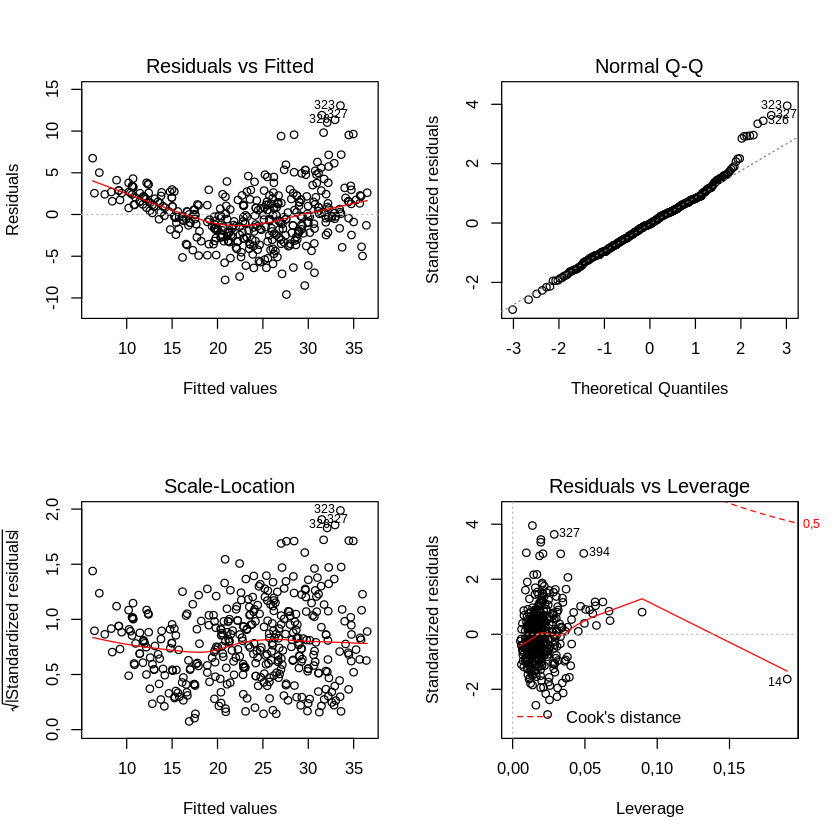

In [48]:
par(mfrow=c(2, 2))
plot(lm.fit2)

In [53]:
lm.fit3 = lm(mpg~(.-name)^2, data=Auto)
summary(lm.fit3)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = mpg ~ (. - name)^2, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-7,6303 -1,4481  0,0596  1,2739 11,1386 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                3,548e+01  5,314e+01   0,668  0,50475   
cylinders                  6,989e+00  8,248e+00   0,847  0,39738   
displacement              -4,785e-01  1,894e-01  -2,527  0,01192 * 
horsepower                 5,034e-01  3,470e-01   1,451  0,14769   
weight                     4,133e-03  1,759e-02   0,235  0,81442   
acceleration              -5,859e+00  2,174e+00  -2,696  0,00735 **
year                       6,974e-01  6,097e-01   1,144  0,25340   
origin                    -2,090e+01  7,097e+00  -2,944  0,00345 **
cylinders:displacement    -3,383e-03  6,455e-03  -0,524  0,60051   
cylinders:horsepower       1,161e-02  2,420e-02   0,480  0,63157   
cylinders:weight           3,575e-04  8,955e-04   0,399  0,69000   
cylinders:acceleration

In [79]:
Auto.X = Auto[,3:length(names(Auto))-1]
Auto.logX = log(Auto.X)
Auto.logX["mpg"] = Auto["mpg"]

In [80]:
head(Auto.logX)

cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg
"2,079442","5,726848","4,867534","8,161660","2,484907","4,248495",0,18
"2,079442","5,857933","5,105945","8,214194","2,442347","4,248495",0,15
"2,079442","5,762051","5,010635","8,142063","2,397895","4,248495",0,18
"2,079442","5,717028","5,010635","8,141190","2,484907","4,248495",0,16
"2,079442","5,710427","4,941642","8,145840","2,351375","4,248495",0,17
"2,079442","6,061457","5,288267","8,375860","2,302585","4,248495",0,15


In [82]:
summary(lm(mpg~., data=Auto.logX))

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = mpg ~ ., data = Auto.logX)

Residuals:
    Min      1Q  Median      3Q     Max 
-9,5987 -1,8172 -0,0181  1,5906 12,8132 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -66,5643    17,5053  -3,803 0,000167 ***
cylinders      1,4818     1,6589   0,893 0,372273    
displacement  -1,0551     1,5385  -0,686 0,493230    
horsepower    -6,9657     1,5569  -4,474 1,01e-05 ***
weight       -12,5728     2,2251  -5,650 3,12e-08 ***
acceleration  -4,9831     1,6078  -3,099 0,002082 ** 
year          54,9857     3,5555  15,465  < 2e-16 ***
origin         1,5822     0,5083   3,113 0,001991 ** 
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 3,069 on 384 degrees of freedom
Multiple R-squared:  0,8482,	Adjusted R-squared:  0,8454 
F-statistic: 306,5 on 7 and 384 DF,  p-value: < 2,2e-16


In [87]:
Auto.sqrtX = sqrt(Auto[, 3:length(names(Auto)) - 1])
Auto.sqrtX["mpg"] = Auto["mpg"]
head(Auto.sqrtX)

cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg
"2,828427","17,52142","11,40175","59,19459","3,464102","8,3666",1,18
"2,828427","18,70829","12,84523","60,77006","3,391165","8,3666",1,15
"2,828427","17,83255","12,24745","58,61740","3,316625","8,3666",1,18
"2,828427","17,43560","12,24745","58,59181","3,464102","8,3666",1,16
"2,828427","17,37815","11,83216","58,72819","3,240370","8,3666",1,17
"2,828427","20,71232","14,07125","65,88627","3,162278","8,3666",1,15


In [88]:
summary(lm(mpg~., data=Auto.sqrtX))

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = mpg ~ ., data = Auto.sqrtX)

Residuals:
    Min      1Q  Median      3Q     Max 
-9,5250 -1,9822 -0,1111  1,7347 13,0681 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -49,79814    9,17832  -5,426 1,02e-07 ***
cylinders     -0,23699    1,53753  -0,154   0,8776    
displacement   0,22580    0,22940   0,984   0,3256    
horsepower    -0,77976    0,30788  -2,533   0,0117 *  
weight        -0,62172    0,07898  -7,872 3,59e-14 ***
acceleration  -0,82529    0,83443  -0,989   0,3233    
year          12,79030    0,85891  14,891  < 2e-16 ***
origin         3,26036    0,76767   4,247 2,72e-05 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 3,21 on 384 degrees of freedom
Multiple R-squared:  0,8338,	Adjusted R-squared:  0,8308 
F-statistic: 275,3 on 7 and 384 DF,  p-value: < 2,2e-16


In [92]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
"9,50",138,73,11,276,120,Bad,42,17,Yes,Yes
"11,22",111,48,16,260,83,Good,65,10,Yes,Yes
"10,06",113,35,10,269,80,Medium,59,12,Yes,Yes
"7,40",117,100,4,466,97,Medium,55,14,Yes,Yes
"4,15",141,64,3,340,128,Bad,38,13,Yes,No
"10,81",124,113,13,501,72,Bad,78,16,No,Yes


In [93]:
lm.fit = lm(Sales~Price+Urban+US, data=Carseats)
summary(lm.fit)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6,9206 -1,6220 -0,0564  1,5786  7,0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13,043469   0,651012  20,036  < 2e-16 ***
Price       -0,054459   0,005242 -10,389  < 2e-16 ***
UrbanYes    -0,021916   0,271650  -0,081    0,936    
USYes        1,200573   0,259042   4,635 4,86e-06 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 2,472 on 396 degrees of freedom
Multiple R-squared:  0,2393,	Adjusted R-squared:  0,2335 
F-statistic: 41,52 on 3 and 396 DF,  p-value: < 2,2e-16


In [94]:
lm.fit2 = lm(Sales~Price+US, data=Carseats)
summary(lm.fit2)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6,9269 -1,6286 -0,0574  1,5766  7,0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13,03079    0,63098  20,652  < 2e-16 ***
Price       -0,05448    0,00523 -10,416  < 2e-16 ***
USYes        1,19964    0,25846   4,641 4,71e-06 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 2,469 on 397 degrees of freedom
Multiple R-squared:  0,2393,	Adjusted R-squared:  0,2354 
F-statistic: 62,43 on 2 and 397 DF,  p-value: < 2,2e-16


In [138]:
confint(lm.fit2)

,"2,5 %","97,5 %"
(Intercept),"11,79032020","14,27126531"
Price,"-0,06475984","-0,04419543"
USYes,"0,69151957","1,70776632"


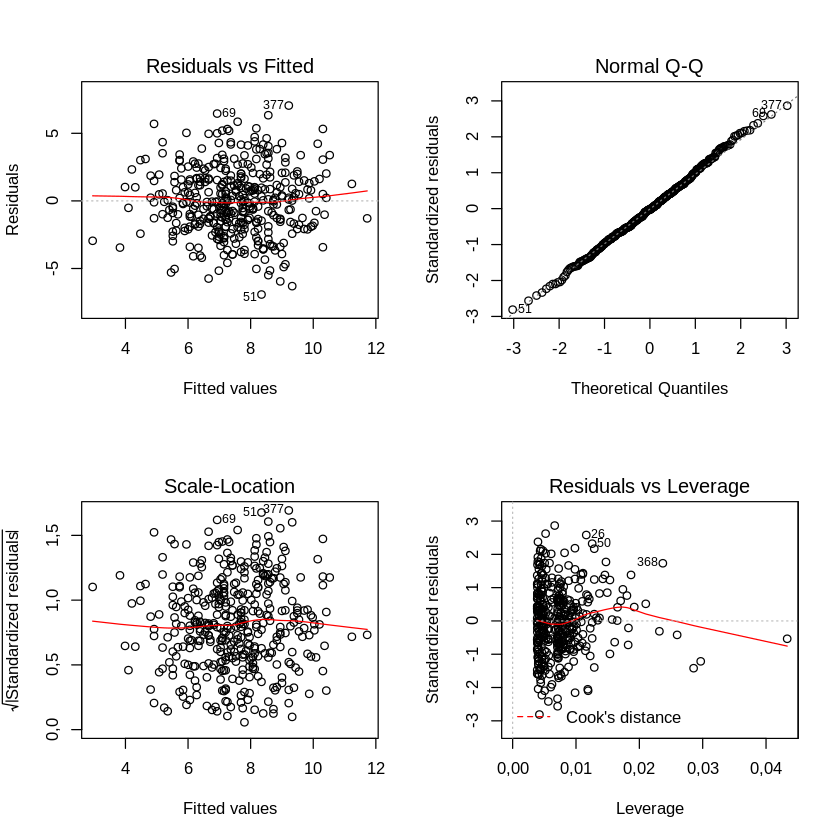

In [141]:
par(mfrow=c(2, 2))
plot(lm.fit2)

In [142]:
set.seed(1)
x = rnorm(100)
y = 2 * x + rnorm(100)

In [143]:
summary(lm(y~x+0))

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-1,9154 -0,6472 -0,1771  0,5056  2,3109 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   1,9939     0,1065   18,73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,9586 on 99 degrees of freedom
Multiple R-squared:  0,7798,	Adjusted R-squared:  0,7776 
F-statistic: 350,7 on 1 and 99 DF,  p-value: < 2,2e-16


In [144]:
summary(lm(x~y+0))

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = x ~ y + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-0,8699 -0,2368  0,1030  0,2858  0,8938 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
y  0,39111    0,02089   18,73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,4246 on 99 degrees of freedom
Multiple R-squared:  0,7798,	Adjusted R-squared:  0,7776 
F-statistic: 350,7 on 1 and 99 DF,  p-value: < 2,2e-16


In [155]:
x = rnorm(100, 1)
eps = rnorm(100, sd=0.25)
y = -1 + 0.5 * x + eps

In [158]:
lm.fit = lm(y~x)

In [159]:
coef(lm.fit)

(Intercept)           x 
 -1,0200408   0,5251175

In [171]:
summary(lm.fit)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-0,6706 -0,2214 -0,0192  0,2324  0,5002 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1,02004    0,03420  -29,82   <2e-16 ***
x            0,52512    0,02551   20,58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,2744 on 98 degrees of freedom
Multiple R-squared:  0,8121,	Adjusted R-squared:  0,8102 
F-statistic: 423,6 on 1 and 98 DF,  p-value: < 2,2e-16


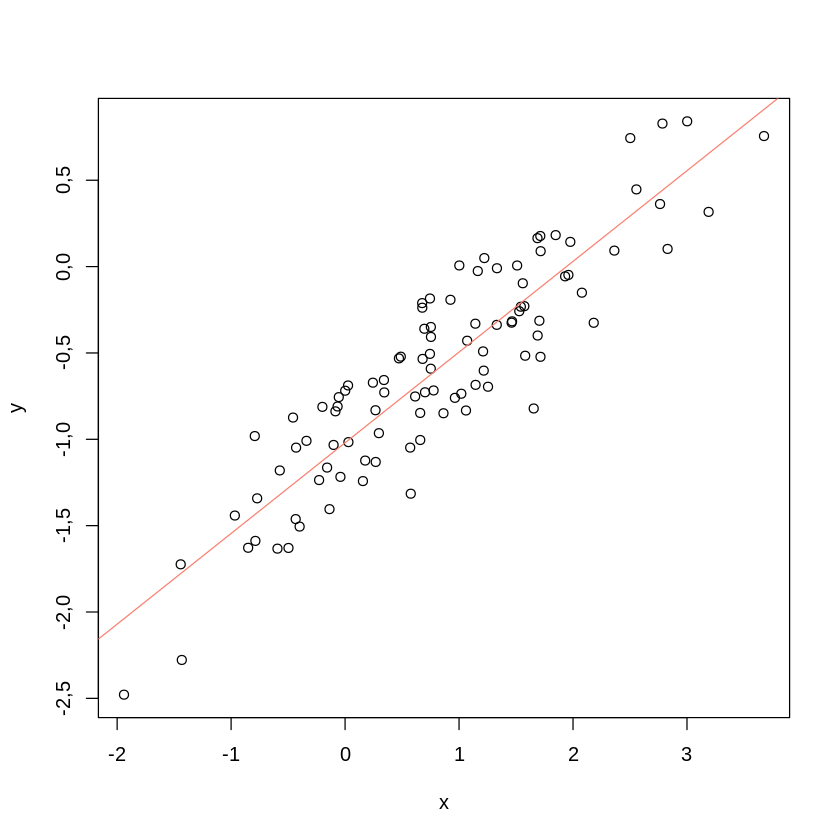

In [169]:
plot(x, y)
abline(lm.fit, col="salmon")

In [170]:
summary(lm(y~x+I(x^2)))

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-0,68505 -0,21648 -0,01337  0,21354  0,49792 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1,00863    0,03468 -29,080   <2e-16 ***
x            0,57216    0,03890  14,708   <2e-16 ***
I(x^2)      -0,02730    0,01714  -1,593    0,114    
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,2722 on 97 degrees of freedom
Multiple R-squared:  0,8169,	Adjusted R-squared:  0,8131 
F-statistic: 216,4 on 2 and 97 DF,  p-value: < 2,2e-16


In [208]:
GenerateData = function(var) {
    x = rnorm(100)
    eps = rnorm(100, sd=var)
    y = -1 + 0.5 * x + eps
    return(data.frame(x, y))
}

In [209]:
df = GenerateData(0.01)
head(df)

x,y
"1,5579537","-0,2272784"
"-0,7292970","-1,3789040"
"-1,5039509","-1,7507410"
"-0,5667870","-1,2891570"
"-2,1044536","-2,0512364"
"0,5307319","-0,7233786"


In [210]:
lm.fit1 = lm(y~x, data=df)
summary(lm.fit1)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0,0163273 -0,0064237 -0,0006239  0,0046484  0,0231893 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0,9980292  0,0009243 -1079,8   <2e-16 ***
x            0,5007990  0,0008850   565,9   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,009128 on 98 degrees of freedom
Multiple R-squared:  0,9997,	Adjusted R-squared:  0,9997 
F-statistic: 3,202e+05 on 1 and 98 DF,  p-value: < 2,2e-16


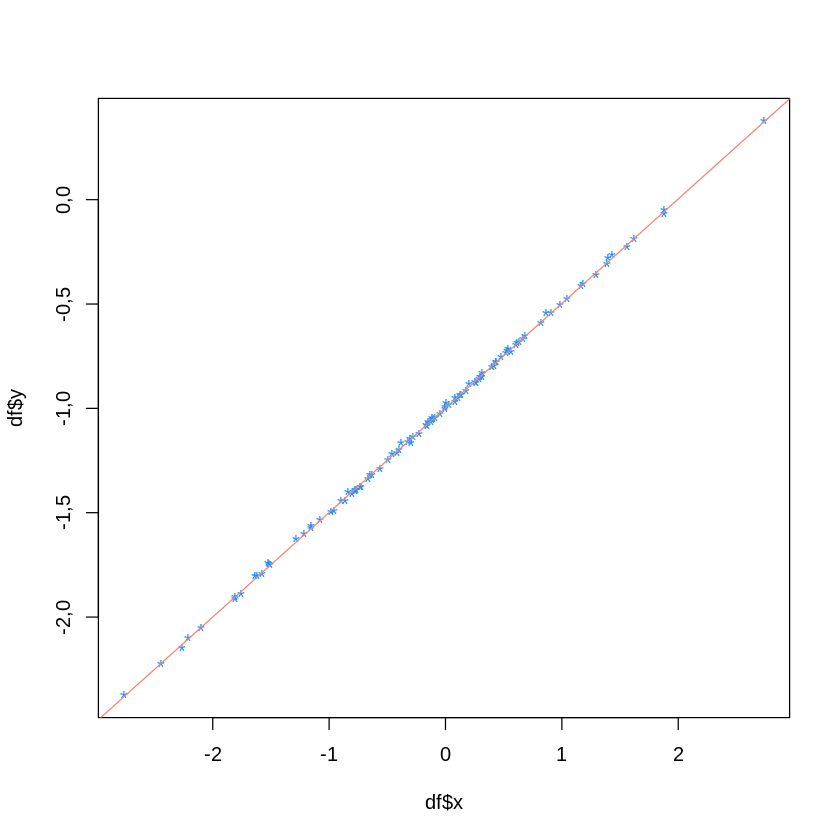

In [211]:
plot(df$x, df$y, col="dodgerblue", pch="*")
abline(lm.fit1, col="salmon")

In [212]:
lm.fit2 = lm(y~x+I(x^2), data=df)
summary(lm.fit2)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x + I(x^2), data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0,0172770 -0,0061398 -0,0004274  0,0042802  0,0236814 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -0,9985151  0,0011150 -895,520   <2e-16 ***
x            0,5009956  0,0009217  543,573   <2e-16 ***
I(x^2)       0,0004750  0,0006070    0,783    0,436    
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,009146 on 97 degrees of freedom
Multiple R-squared:  0,9997,	Adjusted R-squared:  0,9997 
F-statistic: 1,595e+05 on 2 and 97 DF,  p-value: < 2,2e-16


In [214]:
df = GenerateData(3)

In [215]:
lm.fit3 = lm(y~x, data=df)
summary(lm.fit3)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5,9977 -2,0677 -0,0096  2,1492  6,3344 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1,1613     0,2819  -4,120 7,93e-05 ***
x             0,5296     0,2663   1,988   0,0496 *  
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 2,818 on 98 degrees of freedom
Multiple R-squared:  0,03878,	Adjusted R-squared:  0,02897 
F-statistic: 3,954 on 1 and 98 DF,  p-value: 0,04956


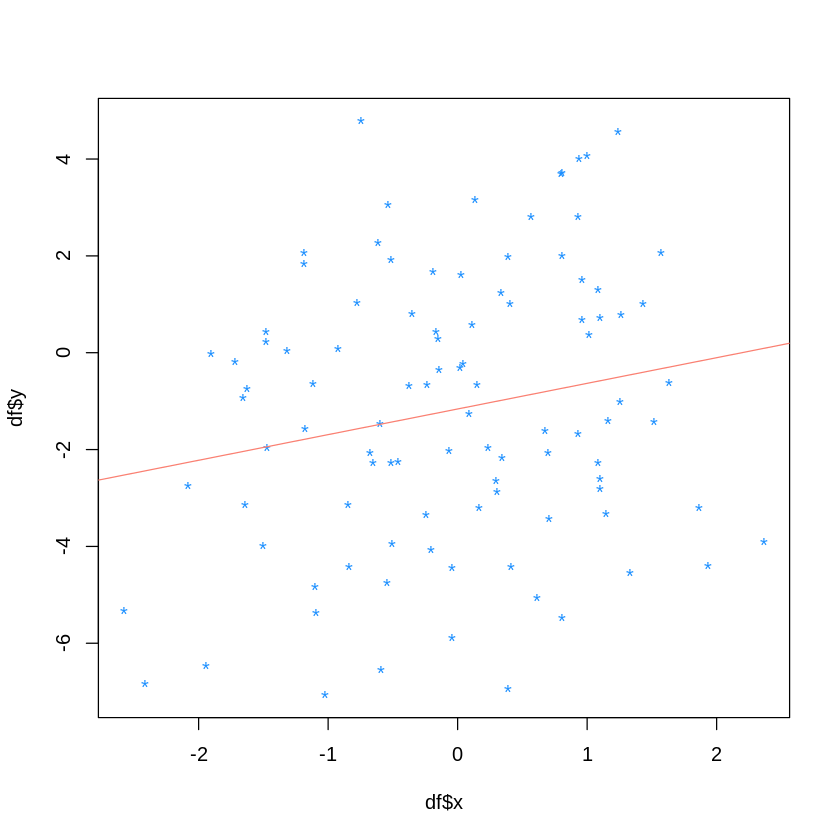

In [217]:
plot(df$x, df$y, col="dodgerblue", pch="*")
abline(lm.fit3, col="salmon")

In [220]:
confint(lm.fit)

,"2,5 %","97,5 %"
(Intercept),"-1,0879139","-0,9521677"
x,"0,4744884","0,5757465"


In [221]:
confint(lm.fit1)

,"2,5 %","97,5 %"
(Intercept),"-0,9998635","-0,9961950"
x,"0,4990428","0,5025553"


In [222]:
confint(lm.fit3)

,"2,5 %","97,5 %"
(Intercept),"-1,720703348","-0,6019487"
x,"0,001050549","1,0580753"


In [223]:
x1 = runif(100)
x2 = 0.5 * x1 + rnorm(100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rnorm(100)

In [224]:
cor(x1, x2)

[1] 0,8796191

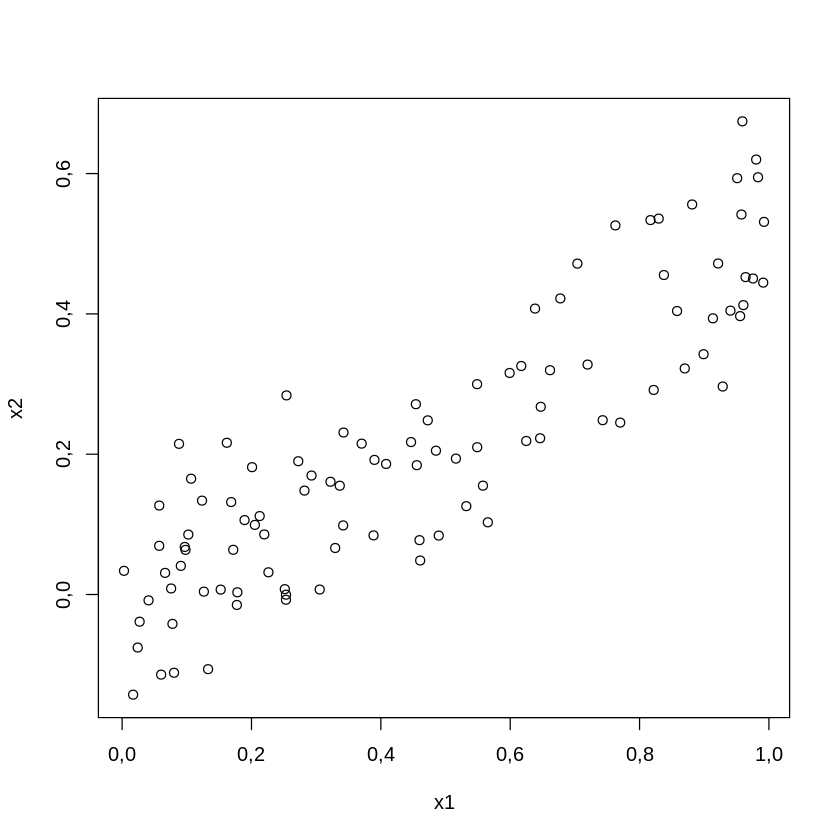

In [225]:
plot(x1, x2)

In [227]:
lm.fit = lm(y~x1+x2)
summary(lm.fit)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2,42148 -0,68038 -0,00177  0,58642  2,23300 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1,7536     0,1773   9,893 2,28e-16 ***
x1            2,8411     0,6517   4,359 3,25e-05 ***
x2           -0,4151     1,0927  -0,380    0,705    
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,9854 on 97 degrees of freedom
Multiple R-squared:  0,4252,	Adjusted R-squared:  0,4133 
F-statistic: 35,87 on 2 and 97 DF,  p-value: 2,174e-12


In [228]:
coef(lm.fit)

(Intercept)          x1          x2 
  1,7536208   2,8410594  -0,4150531

In [229]:
lm.fit2 = lm(y~x1)
summary(lm.fit2)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2,40106 -0,66632 -0,02988  0,58601  2,20650 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1,7667     0,1731  10,207  < 2e-16 ***
x1            2,6233     0,3087   8,499 2,16e-13 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 0,9811 on 98 degrees of freedom
Multiple R-squared:  0,4243,	Adjusted R-squared:  0,4184 
F-statistic: 72,23 on 1 and 98 DF,  p-value: 2,16e-13


In [230]:
lm.fit3 = lm(y~x2)
summary(lm.fit3)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2,29272 -0,76919  0,06684  0,72483  2,17798 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2,1831     0,1603  13,617  < 2e-16 ***
x2            3,7747     0,5655   6,675 1,49e-09 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,072 on 98 degrees of freedom
Multiple R-squared:  0,3126,	Adjusted R-squared:  0,3056 
F-statistic: 44,56 on 1 and 98 DF,  p-value: 1,489e-09


In [231]:
x1 = c(x1, 0.1)
x2 = c(x2, 0.8)
y = c(y, 6)
lm.fit4 = lm(y~x1+x2)
summary(lm.fit4)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x1 + x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2,34184 -0,66086 -0,05127  0,68108  2,42707 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1,8916     0,1805  10,478   <2e-16 ***
x1            1,5343     0,5404   2,839   0,0055 ** 
x2            1,9099     0,8711   2,192   0,0307 *  
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,033 on 98 degrees of freedom
Multiple R-squared:  0,3949,	Adjusted R-squared:  0,3826 
F-statistic: 31,98 on 2 and 98 DF,  p-value: 2,032e-11


In [232]:
lm.fit5 = lm(y~x1)
summary(lm.fit5)

Warning message in printCoefmat(coefs, digits = digits, signif.stars = signif.stars, :
“NAs introduced by coercion”


Call:
lm(formula = y ~ x1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2,4566 -0,6871 -0,0659  0,6205  3,8818 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1,8698     0,1837  10,179  < 2e-16 ***
x1            2,4842     0,3291   7,548  2,2e-11 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,053 on 99 degrees of freedom
Multiple R-squared:  0,3653,	Adjusted R-squared:  0,3589 
F-statistic: 56,97 on 1 and 99 DF,  p-value: 2,202e-11


In [233]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
"0,00632",18,"2,31",0,"0,538","6,575","65,2","4,0900",1,296,"15,3","396,90","4,98","24,0"
"0,02731",0,"7,07",0,"0,469","6,421","78,9","4,9671",2,242,"17,8","396,90","9,14","21,6"
"0,02729",0,"7,07",0,"0,469","7,185","61,1","4,9671",2,242,"17,8","392,83","4,03","34,7"
"0,03237",0,"2,18",0,"0,458","6,998","45,8","6,0622",3,222,"18,7","394,63","2,94","33,4"
"0,06905",0,"2,18",0,"0,458","7,147","54,2","6,0622",3,222,"18,7","396,90","5,33","36,2"
"0,02985",0,"2,18",0,"0,458","6,430","58,7","6,0622",3,222,"18,7","394,12","5,21","28,7"


In [234]:
cor(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,"1,00000000","-0,20046922","0,40658341","-0,055891582","0,42097171","-0,21924670","0,35273425","-0,37967009","0,625505145","0,58276431","0,2899456","-0,38506394","0,4556215","-0,3883046"
zn,"-0,20046922","1,00000000","-0,53382819","-0,042696719","-0,51660371","0,31199059","-0,56953734","0,66440822","-0,311947826","-0,31456332","-0,3916785","0,17552032","-0,4129946","0,3604453"
indus,"0,40658341","-0,53382819","1,00000000","0,062938027","0,76365145","-0,39167585","0,64477851","-0,70802699","0,595129275","0,72076018","0,3832476","-0,35697654","0,6037997","-0,4837252"
chas,"-0,05589158","-0,04269672","0,06293803","1,000000000","0,09120281","0,09125123","0,08651777","-0,09917578","-0,007368241","-0,03558652","-0,1215152","0,04878848","-0,0539293","0,1752602"
nox,"0,42097171","-0,51660371","0,76365145","0,091202807","1,00000000","-0,30218819","0,73147010","-0,76923011","0,611440563","0,66802320","0,1889327","-0,38005064","0,5908789","-0,4273208"
rm,"-0,21924670","0,31199059","-0,39167585","0,091251225","-0,30218819","1,00000000","-0,24026493","0,20524621","-0,209846668","-0,29204783","-0,3555015","0,12806864","-0,6138083","0,6953599"
age,"0,35273425","-0,56953734","0,64477851","0,086517774","0,73147010","-0,24026493","1,00000000","-0,74788054","0,456022452","0,50645559","0,2615150","-0,27353398","0,6023385","-0,3769546"
dis,"-0,37967009","0,66440822","-0,70802699","-0,099175780","-0,76923011","0,20524621","-0,74788054","1,00000000","-0,494587930","-0,53443158","-0,2324705","0,29151167","-0,4969958","0,2499287"
rad,"0,62550515","-0,31194783","0,59512927","-0,007368241","0,61144056","-0,20984667","0,45602245","-0,49458793","1,000000000","0,91022819","0,4647412","-0,44441282","0,4886763","-0,3816262"
tax,"0,58276431","-0,31456332","0,72076018","-0,035586518","0,66802320","-0,29204783","0,50645559","-0,53443158","0,910228189","1,00000000","0,4608530","-0,44180801","0,5439934","-0,4685359"


In [243]:
x = Boston$zn
lm(crim~x, data=Boston)


Call:
lm(formula = crim ~ x, data = Boston)

Coefficients:
(Intercept)            x  
    4,45369     -0,07393  
